<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/IRI_defects_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка библиотек**

In [16]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

**Импорт библиотек**

In [17]:
from fastai.vision.all import *

**Загрузка данных**

In [18]:
path =  Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training')

In [19]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm'),Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Bad')]

Скачивание файлов изображений.

In [20]:
files = get_image_files(path)

In [21]:
len(files)

214

In [22]:
files[0],files[2]

(Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm/img_thermal_1637761638400.jpg'),
 Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm/img_thermal_1637761920622.jpg'))

**Создание датасета**

Используется DataBlock и DataLoader, которые считывает разметку данных с названия папки с помощью функции parent_label.



In [23]:
IRI_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label)

In [24]:
IRI_data = IRI_data.new(item_tfms=Resize(224),batch_tfms=aug_transforms(mult=2))

In [25]:
dls = IRI_data.dataloaders(path)

Просмотр примера изображений

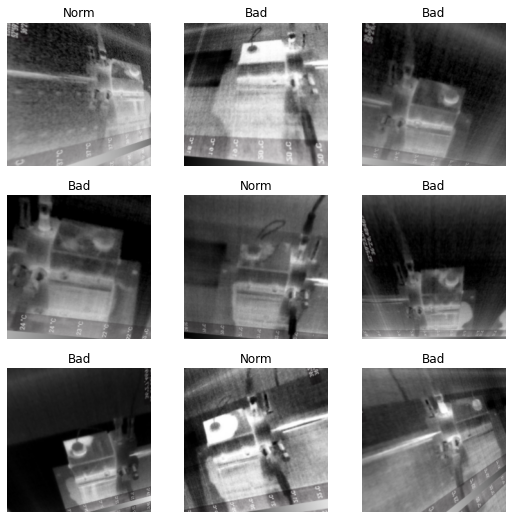

In [26]:
dls.show_batch()

**Обучение**

In [27]:
??cnn_learner

In [28]:
learn = cnn_learner(dls,resnet18,metrics=error_rate,pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Целевая функция

In [29]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

Метод поиска экстремума

In [30]:
learn.opt_func

<function fastai.optimizer.Adam>

Подбор скорости обучения
Строку ниже можно закоментировать. Для случая трансферного обучения resnet18 рекомендуемая скорость обучения lr
SuggestedLRs(valley=0.0014454397605732083)

In [ ]:
learn.lr_find()

In [32]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.293339,4.456367,0.738095,00:49


epoch,train_loss,valid_loss,error_rate,time
0,1.490287,3.374768,0.738095,00:40
1,1.392739,2.197639,0.738095,00:40
2,1.407170,1.590114,0.738095,00:40
3,1.347571,1.161736,0.619048,00:40
4,1.286375,0.875464,0.476190,00:40
5,1.245077,0.706543,0.380952,00:40
6,1.202625,0.681492,0.380952,00:40
7,1.205756,0.680654,0.380952,00:40
8,1.174959,0.678553,0.357143,00:40
9,1.162710,0.673966,0.309524,00:40


**Результаты**

Предсказание для любого конкретного изображения

In [33]:
learn.predict(files[101]),files[101]

(('Bad', TensorBase(0), TensorBase([0.7817, 0.2183])),
 Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Bad/img_thermal_1637833041811.jpg'))

Визуализация предсказаний.

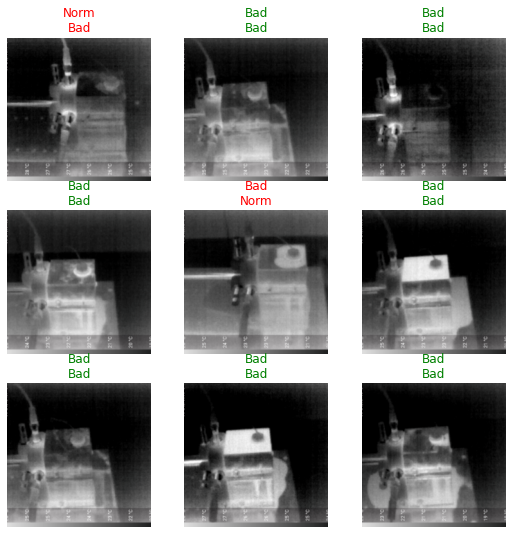

In [34]:
learn.show_results()

**Оценка точности**

Матрица ошибок

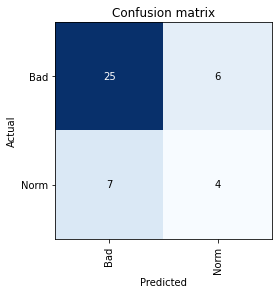

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [36]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

25 6 7 4


In [38]:
sensitivity = tp/(tp + fn)
sensitivity

0.36363636363636365

Специфичность

In [39]:
specificity = tn/(fp + tn)
specificity

0.8064516129032258

Positive Predictive Value (PPV)

In [40]:
ppv = tp/(tp+fp)
ppv

0.4

Negative Predictive Value (NPV)

In [41]:
npv = tn/(tn+fn)
npv

0.78125

Calculating Accuracy

In [44]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.6904761904761905

Ссылки:
https://github.com/avkornaev/Fast_AI_course/blob/main/02_production_v3_online.ipynb

https://docs.fast.ai/tutorial.medical_imaging.html

https://docs.fast.ai/data.block.html#DataBlock


